# Image Classifier for separating Manisha and Urmila

In [2]:
from fastai.vision.all import *
from fastai.vision.widgets import *

In [3]:
import sys
sys.path.insert(1, '/storage/fastbook')
from utils import search_images_ddg

### First let us download the images for Manisha and Urmila

In [4]:
labels = ['manish koirala', 'urmila matondkar']
path = Path('./images/manisha_urmila')

In [5]:
if not path.exists():
    path.mkdir()
    for o in labels:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{o}', max_n=1000)
        
        # Download images
        i=0
        for url in results:    
            if url[-4:] in ['.png','.jpg','.PNG','.JPG']:
                i+=1
                if i==900:
                    break

                file_name = (dest/f'{o}_{i}.{url[-4:]}')
                try:
                    download_url(url, file_name)
                except:
                    continue

Check if the images have been downloaded correctly

In [22]:
fns = get_image_files(path)
fns

(#1281) [Path('images/manisha_urmila/manish koirala/manish koirala_323.jpg'),Path('images/manisha_urmila/manish koirala/manish koirala_253.jpg'),Path('images/manisha_urmila/manish koirala/manish koirala_84.jpg'),Path('images/manisha_urmila/manish koirala/manish koirala_49.jpg'),Path('images/manisha_urmila/manish koirala/manish koirala_175.jpg'),Path('images/manisha_urmila/manish koirala/manish koirala_270.jpg'),Path('images/manisha_urmila/manish koirala/manish koirala_261.jpg'),Path('images/manisha_urmila/manish koirala/manish koirala_472.jpg'),Path('images/manisha_urmila/manish koirala/manish koirala_487.jpg'),Path('images/manisha_urmila/manish koirala/manish koirala_622.jpg')...]

Check if the images are not corrupted

In [26]:
failed = verify_images(fns)
failed

(#1) [Path('images/manisha_urmila/urmila matondkar/urmila matondkar_185.jpg')]

Delete failed images

In [8]:
failed.map(Path.unlink)

(#0) []

In [27]:
# for i in range(0,1300):
#     fn = fns[i:i+1]
#     verify_images(fn)
#     print(fn[0])

In [20]:
fns = get_image_files(path)
fns

(#1281) [Path('images/manisha_urmila/manish koirala/manish koirala_323.jpg'),Path('images/manisha_urmila/manish koirala/manish koirala_253.jpg'),Path('images/manisha_urmila/manish koirala/manish koirala_84.jpg'),Path('images/manisha_urmila/manish koirala/manish koirala_49.jpg'),Path('images/manisha_urmila/manish koirala/manish koirala_175.jpg'),Path('images/manisha_urmila/manish koirala/manish koirala_270.jpg'),Path('images/manisha_urmila/manish koirala/manish koirala_261.jpg'),Path('images/manisha_urmila/manish koirala/manish koirala_472.jpg'),Path('images/manisha_urmila/manish koirala/manish koirala_487.jpg'),Path('images/manisha_urmila/manish koirala/manish koirala_622.jpg')...]

Check one of the images

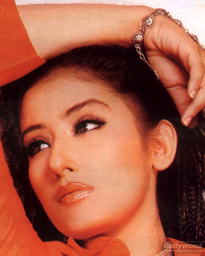

In [83]:
im = Image.open(fns[1])
im.thumbnail((256,256))
im

### Start the process of creating the data

In [84]:
actresses = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    #item_tfms=Resize(512, ResizeMethod.Pad, pad_mode='zeros')
    batch_tfms=aug_transforms(max_warp=0)
)

In [85]:
dls = actresses.dataloaders(path)

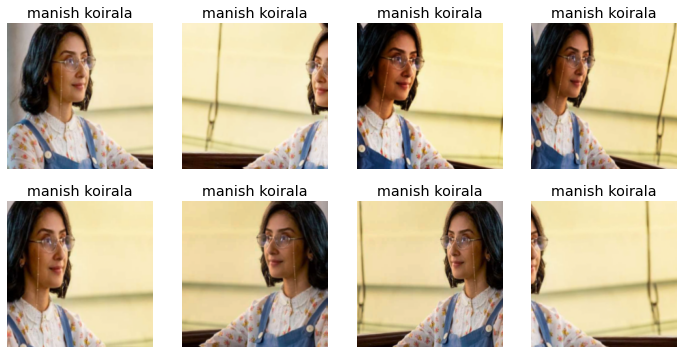

In [86]:
dls.train.show_batch(max_n=8, nrows=2, unique=True)

### Train the Model

In [87]:
learn = cnn_learner(dls, resnet50, metrics=error_rate)
learn.fine_tune(6)

epoch,train_loss,valid_loss,error_rate,time
0,0.872975,1.002020,0.219008,00:13


epoch,train_loss,valid_loss,error_rate,time
0,0.760734,0.581131,0.161157,00:15
1,0.519486,0.942077,0.165289,00:16
2,0.402445,0.665077,0.152893,00:16
3,0.321867,0.535458,0.136364,00:16
4,0.251624,0.470226,0.132231,00:16
5,0.196444,0.451348,0.123967,00:16


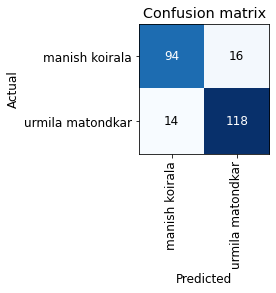

In [88]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

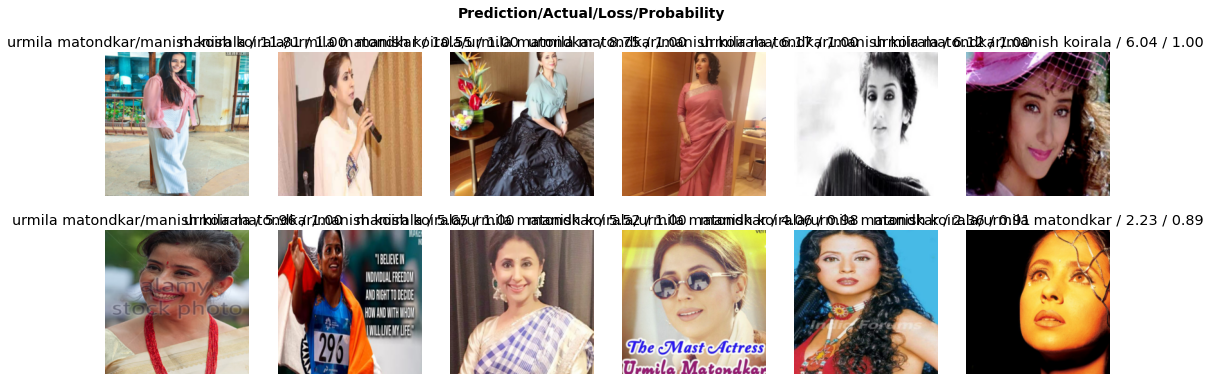

In [89]:
interp.plot_top_losses(12, nrows=2)

In [90]:
from utils import *
from fastai.vision.widgets import * 
cleaner = ImageClassifierCleaner(learn)
cleaner

In [91]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()